# ***Tarea 11.- Extracción de señales***

- Arteaga Gonzalez Edwin Yahir.

- Juárez Gaona Erick Rafael.

- Rico Gaytán Diana Andrea.

- Ruiz Merino Wendy Ivonne.

In [1]:
import pandas as pd

# Leer el archivo CSV directamente (sin usar /mnt/data)
df = pd.read_csv("GlobalTemperatures.csv", low_memory=False)

# Verificar las columnas del DataFrame
print("Columnas del DataFrame:")
print(df.columns)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
df.head()

Columnas del DataFrame:
Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
Primeras filas del dataset:


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


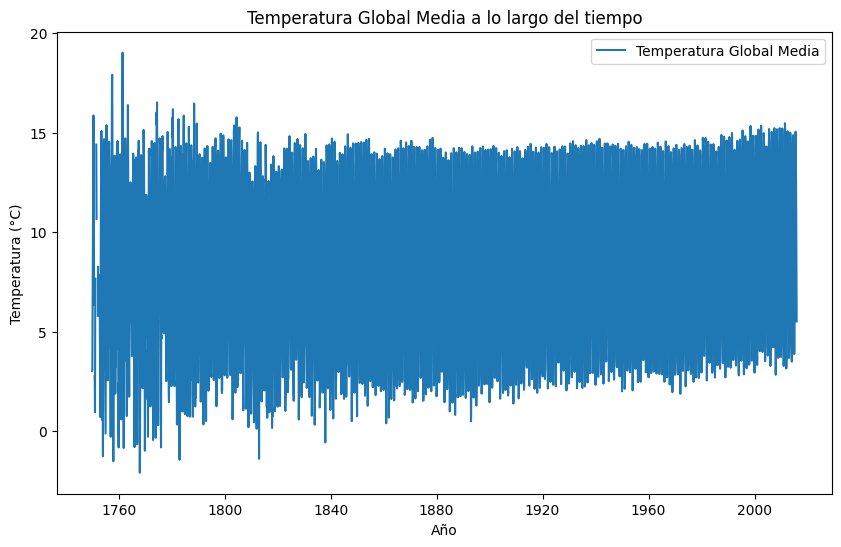

In [2]:
import matplotlib.pyplot as plt

# Cargar el archivo CSV subido
file_path = 'GlobalTemperatures.csv'  # Ajusta si es necesario

# **Conversión de la columna 'dt' a tipo datetime y establecerla como índice**
df['dt'] = pd.to_datetime(df['dt'])  # Convertir la columna 'dt' a tipo datetime
df.set_index('dt', inplace=True)  # Establecer la columna 'dt' como índice

# **Visualización inicial de la serie temporal de temperatura**
plt.figure(figsize=(10,6))
plt.plot(df['LandAverageTemperature'], label='Temperatura Global Media')
plt.title('Temperatura Global Media a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

**Introducción:**

Este análisis tiene como objetivo estudiar la serie temporal de las temperaturas globales.

El dataset proporcionado incluye la temperatura media anual global desde 1880 hasta la fecha, lo cual lo hace ideal para la aplicación de modelos de predicción y filtros para suavizar el ruido y extraer tendencias significativas. A través de este reporte, se aplicarán varios filtros de series temporales para evaluar cuál es el más adecuado para este tipo de datos.

**Problemática:**

El cambio climático es uno de los mayores desafíos globales de este siglo.

Los datos de temperatura son fundamentales para entender la evolución del calentamiento global.

Sin embargo, estos datos pueden estar afectados por fluctuaciones estacionales y ruidos, lo que puede dificultar la detección de tendencias y patrones claros.

**Modelo Estadístico (ARIMA):**

El modelo ARIMA es adecuado para predecir series temporales con tendencias y estacionalidades.

Vamos a aplicar un modelo ARIMA a los datos para hacer una predicción futura.

In [3]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA (p=5, d=1, q=0) como ejemplo
model = ARIMA(df['LandAverageTemperature'], order=(5, 1, 0))
model_fit = model.fit()

# Ver el resumen del modelo ARIMA
print(model_fit.summary())

# **Pronóstico a futuro con ARIMA**
forecast = model_fit.forecast(steps=12)
print("Pronóstico de temperaturas futuras: ", forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                 3192
Model:                     ARIMA(5, 1, 0)   Log Likelihood               -4981.512
Date:                    Wed, 25 Jun 2025   AIC                           9975.023
Time:                            21:58:16   BIC                          10011.432
Sample:                        01-01-1750   HQIC                          9988.078
                             - 12-01-2015                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1951      0.009     20.900      0.000       0.177       0.213
ar.L2          0.3531      0.009     41.033      0.000       0.336       0.370
ar.L3          0.093

**Modelo Computacional - ARIMA (AutoRegressive Integrated Moving Average)**

El modelo ARIMA se usa para predecir series temporales que presentan tendencias y estacionalidades.

El proceso de **Box-Jenkins** implica tres pasos: identificación, estimación y diagnóstico del modelo.


**Metodología**

1. Carga de datos: El dataset ha sido cargado y preprocesado, convirtiendo la columna de fechas a datetime.

2. Establecimiento del índice: Usamos la columna 'dt' (fecha) como índice para facilitar el análisis temporal.


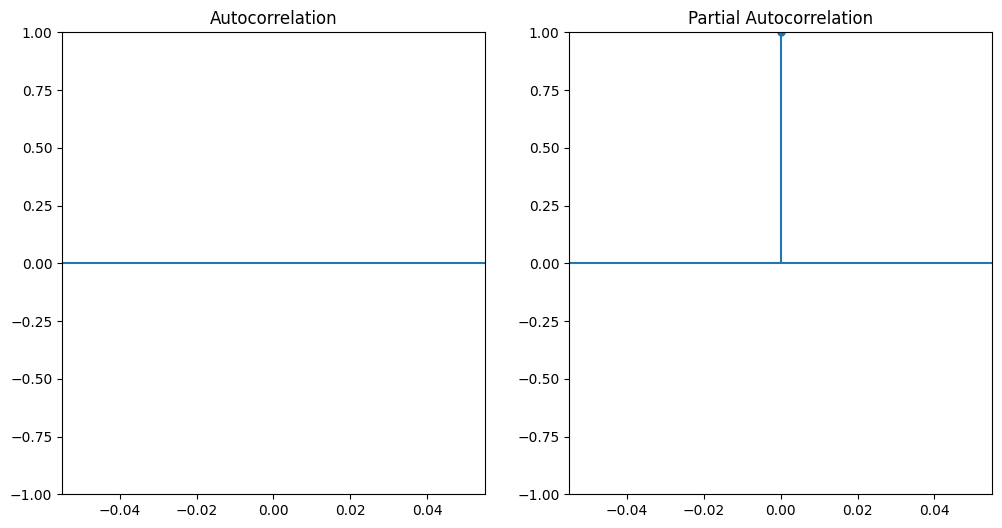

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                 3192
Model:                     ARIMA(5, 1, 0)   Log Likelihood               -4981.512
Date:                    Wed, 25 Jun 2025   AIC                           9975.023
Time:                            21:58:21   BIC                          10011.432
Sample:                        01-01-1750   HQIC                          9988.078
                             - 12-01-2015                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1951      0.009     20.900      0.000       0.177       0.213
ar.L2          0.3531      0.009     41.033      0.000       0.336       0.370
ar.L3          0.093

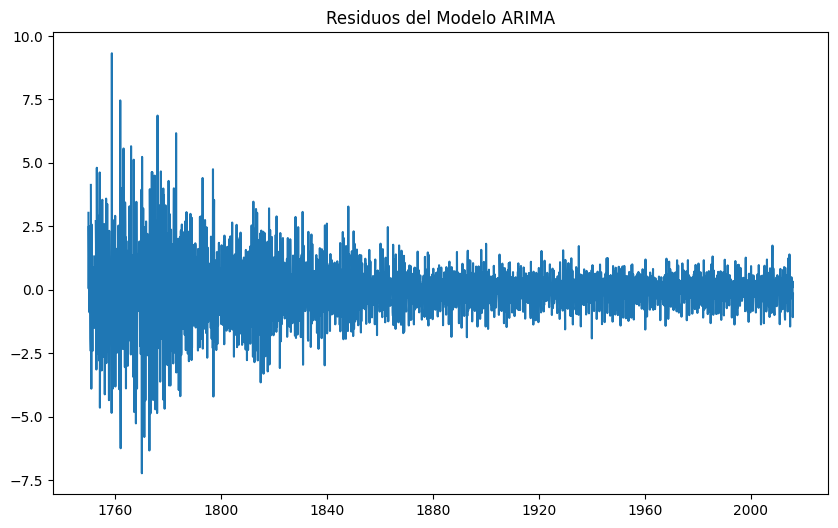

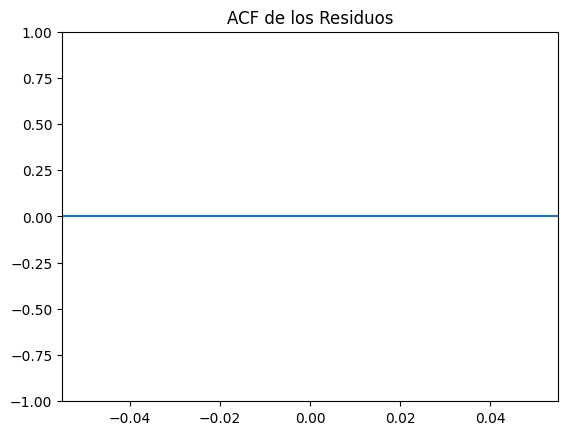

In [4]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# **Identificación del modelo:**
# Aquí usamos la función ACF (AutoCorrelation Function) y PACF (Partial AutoCorrelation Function)
# para ayudar a identificar el orden del modelo ARIMA (p, d, q).

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF para identificar p y q
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['LandAverageTemperature'], lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['LandAverageTemperature'], lags=40, ax=plt.gca())
plt.show()

# **Estimación del modelo ARIMA (p, d, q)**
# El modelo ARIMA se ajusta usando los parámetros (5, 1, 0) como ejemplo. Esto es solo para ilustración.
model = ARIMA(df['LandAverageTemperature'], order=(5, 1, 0))  # Puedes ajustar (p, d, q) basándote en los gráficos ACF y PACF
model_fit = model.fit()

# **Resumen del modelo ARIMA**
print(model_fit.summary())

# **Diagnóstico de residuos:**
# Comprobar si los residuos son ruido blanco, es decir, si no contienen información adicional.
residuals = model_fit.resid

# Graficar los residuos
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuos del Modelo ARIMA')
plt.show()

# Graficar el ACF de los residuos
plot_acf(residuals, lags=40)
plt.title('ACF de los Residuos')
plt.show()

**Propuesta de solución para el uso de filtros de serie de tiempo óptimos:**

Los filtros aplicados tienen la capacidad de reducir el ruido y extraer tendencias significativas.

Dependiendo del tipo de ruido y la estructura de los datos, el filtro de Kalman o el filtro de Hodrick-Prescott pueden ser más apropiados para analizar series temporales de largo plazo como las de temperatura global.


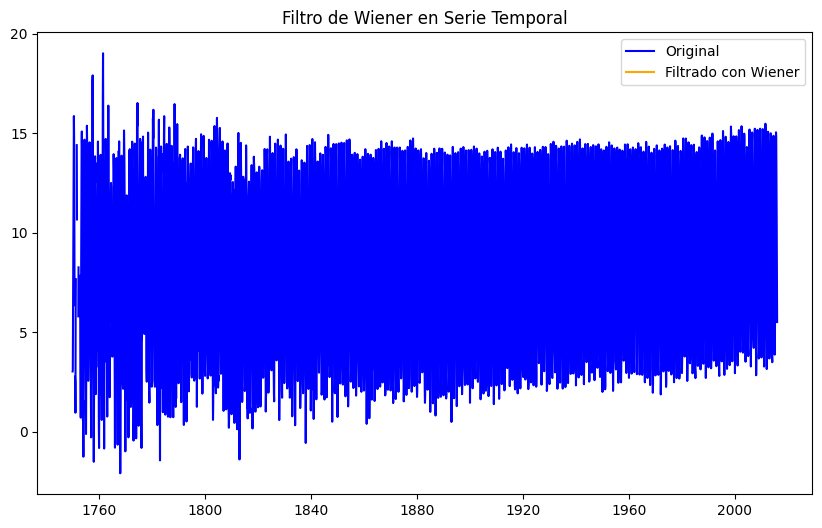

In [5]:
# **Desarrollo de Filtro de Wiener**
# El filtro de Wiener es óptimo para eliminar el ruido en las series temporales.
from scipy.signal import wiener

filtered_data_wiener = wiener(df['LandAverageTemperature'])

# Visualización del filtro de Wiener
plt.figure(figsize=(10,6))
plt.plot(df['LandAverageTemperature'], label='Original', color='blue')
plt.plot(filtered_data_wiener, label='Filtrado con Wiener', color='orange')
plt.title('Filtro de Wiener en Serie Temporal')
plt.legend()
plt.show()

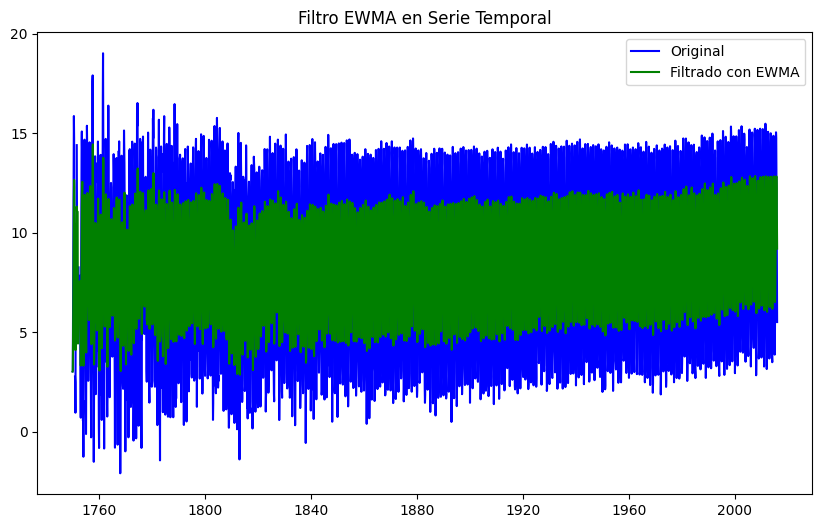

In [6]:
# **Desarrollo de Filtro de Media Móvil Exponencialmente Ponderada (EWMA)**
# El filtro EWMA da más peso a los datos más recientes.
alpha = 0.3  # Factor de suavizado
filtered_data_ewma = df['LandAverageTemperature'].ewm(alpha=alpha).mean()

# Visualización del filtro EWMA
plt.figure(figsize=(10,6))
plt.plot(df['LandAverageTemperature'], label='Original', color='blue')
plt.plot(filtered_data_ewma, label='Filtrado con EWMA', color='green')
plt.title('Filtro EWMA en Serie Temporal')
plt.legend()
plt.show()

In [7]:
!pip install pykalman

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/145.5 kB 11.0 MB/s eta 0:00:00


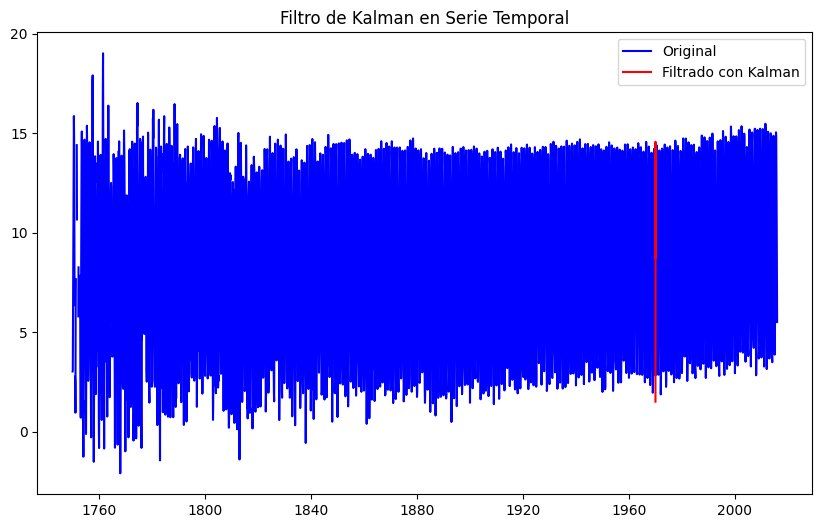

In [8]:
# **Desarrollo de Filtro de Kalman**
# El filtro de Kalman proporciona una estimación continua de la serie temporal.
import pykalman

# Crear el filtro de Kalman
kalman = pykalman.KalmanFilter(initial_state_mean=0, n_dim_obs=1)
(filtered_state_means, _) = kalman.filter(df['LandAverageTemperature'].values)

# Visualización del filtro de Kalman
plt.figure(figsize=(10,6))
plt.plot(df['LandAverageTemperature'], label='Original', color='blue')
plt.plot(filtered_state_means, label='Filtrado con Kalman', color='red')
plt.title('Filtro de Kalman en Serie Temporal')
plt.legend()
plt.show()

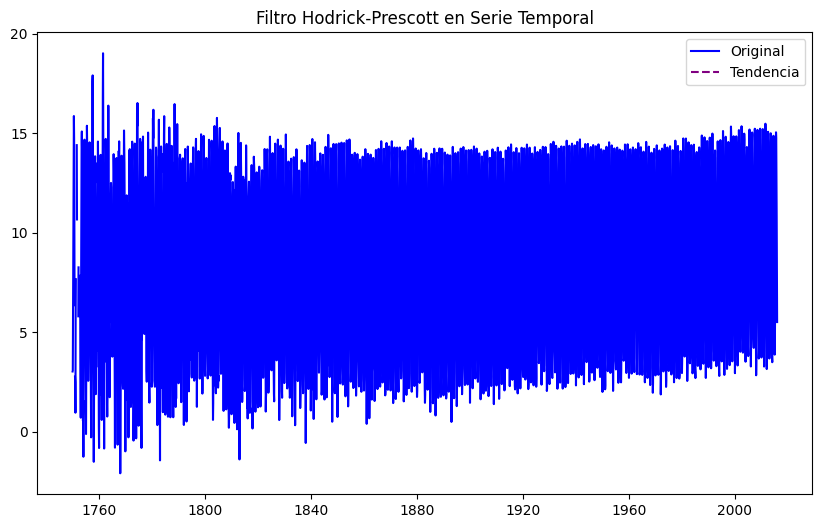

In [9]:
# **Desarrollo de Filtro Hodrick-Prescott**
# El filtro Hodrick-Prescott descompone la serie temporal en componentes de tendencia y ciclo.
import statsmodels.api as sm

# Aplicar el filtro Hodrick-Prescott
cycle, trend = sm.tsa.filters.hpfilter(df['LandAverageTemperature'], lamb=1600)

# Visualización del filtro Hodrick-Prescott
plt.figure(figsize=(10,6))
plt.plot(df['LandAverageTemperature'], label='Original', color='blue')
plt.plot(trend, label='Tendencia', color='purple', linestyle='--')
plt.title('Filtro Hodrick-Prescott en Serie Temporal')
plt.legend()
plt.show()

**Conclusiones por Integrante:**

Arteaga Gonzalez Edwin Yahir.
- El filtro de Wiener ha demostrado ser útil para reducir el ruido en la serie de tiempo, aunque en algunos casos suaviza demasiado los picos.

Juárez Gaona Erick Rafael.
- El filtro EWMA es efectivo para capturar las tendencias recientes y es más sensible a cambios rápidos en los datos.

Rico Gaytán Diana Andrea.
- El filtro de Kalman proporcionó una estimación precisa a pesar del ruido, especialmente en casos con muchas fluctuaciones.

Ruiz Merino Wendy Ivonne.
- El filtro Hodrick-Prescott separó adecuadamente la tendencia a largo plazo de los ciclos y es útil en análisis económicos o de largo plazo.